In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve

## Parametry eksperymentów i obliczeń

In [83]:
# V początkowa roztworu polimeru, L
V0 = 25/1000.0

# stężenie początkowe polimeru, mol/L
cP = ((75/1000)/130)/V0

# stężenie Ca2+ w biurecie, mol/L
cL = 0.25

# początek i koniec miareczkowania
# objęctość Ca+2, L
VL0 = 0
VL1 = 3/1000

# liczba kroków miareczkowania
N = 50




## Symulacje miareczkowania dla modelu 1:1

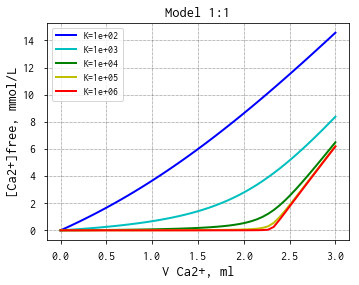

In [97]:

# stałe trwałości do przetestowania
KK = [100,1000,10000,100000,1000000]

# MODEL1
# stechiomeria 1:1 Ca2+(L):COOH(P) 

def model11(vars,K,L0,P0):
    x = vars[0]
    eq1 = x - K*(L0-x)*(P0-x)
    return [eq1]


for K in KK:
    VVL = np.linspace(VL0,VL1,N)
    data = np.zeros((7,N))
    i = 0
    for VL in VVL:
        guess = [1e-3]
        Vtotal = V0 + VL
        nL0 = VL*cL
        nP0 = V0*cP
        L0 = nL0/Vtotal
        P0 = nP0/Vtotal
        x, = fsolve(model11, guess, args=(K,L0, P0))
        Lb = x
        Lf = L0 - Lb
        nLb = Lb*Vtotal
        nLf = Lf*Vtotal
        
        data[0,i] = Vtotal
        data[1,i] = VL
        data[2,i] = nL0
        data[3,i] = nLf
        data[4,i] = nLb
        data[5,i] = Lf
        data[6,i] = Lb        
        i = i + 1
        
    plt.plot(data[1,:]*1000, data[5,:]*1000,'-',label="K={:.0e}".format(K))

plt.grid()
plt.legend()   
plt.xlabel('V Ca2+, ml')
plt.ylabel('[Ca2+]free, mmol/L')
plt.title('Model 1:1')
plt.savefig('model11.png',dpi=300)

## Symulacje miareczkowania dla modelu 1:2

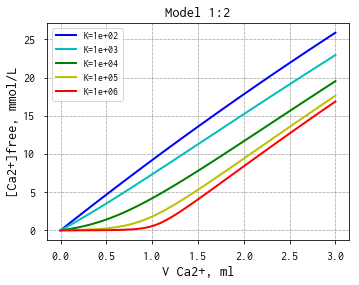

In [98]:

# stałe trwałości do przetestowania
KK = [100,1000,10000,100000,1000000]


# MODEL2
# stechiomeria 1:2 Ca2+(L):COOH(P) 

def model12(vars,K,L0,P0):
    x = vars[0]
    eq1 = x - K*(L0-x)*(P0-2*x)**2
    return [eq1]


for K in KK:
    VVL = np.linspace(VL0,VL1,N)
    data = np.zeros((7,N))
    i = 0
    for VL in VVL:
        guess = [1e-3]
        Vtotal = V0 + VL
        nL0 = VL*cL
        nP0 = V0*cP
        L0 = nL0/Vtotal
        P0 = nP0/Vtotal
        x, = fsolve(model12, guess, args=(K,L0, P0))
        Lb = x
        Lf = L0 - Lb
        nLb = Lb*Vtotal
        nLf = Lf*Vtotal
        
        data[0,i] = Vtotal
        data[1,i] = VL
        data[2,i] = nL0
        data[3,i] = nLf
        data[4,i] = nLb
        data[5,i] = Lf
        data[6,i] = Lb        
        i = i + 1
        
    plt.plot(data[1,:]*1000, data[5,:]*1000,'-',label="K={:.0e}".format(K))

plt.grid()
plt.legend()   
plt.xlabel('V Ca2+, ml')
plt.ylabel('[Ca2+]free, mmol/L')
plt.title('Model 1:2')
plt.savefig('model12.png',dpi=300)

## Porównanie eksperymentu z modelem
### K i typ modelu trzeba zmieniać

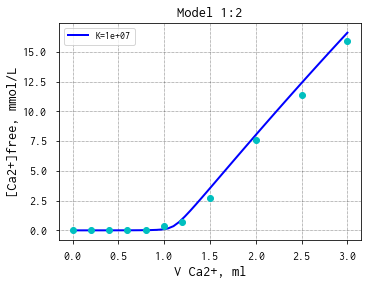

In [101]:

# miareczkowanie 26.04.2019 PIA1
# V[ml],Cca2+[mmol/l]
exp1 = np.array([
[0,0],
[0.2,0.000161701],
[0.4,0.001467202],
[0.6,0.010931452],
[0.8,0.062040029],
[1,0.348811247],
[1.2,0.718480629],
[1.5,2.698241768],
[2,7.575332424],
[2.5,11.34107925],
[3,15.89928403],
])


# miareczkowanie 25.04.2019 PIA1
# V[ml],Cca2+[mmol/l]
exp2 = np.array([
[0,0],
[0.2,0.774497848],
[0.4,1.888888796],
[0.6,2.854530742],
[0.8,4.154899109],
[1.1,6.580623381],
[1.5,10.42254046],
[2,15.31351865],
[2.5,20.67738425],
[3,25.1816464],
[3.5,30.6670954],
[4,34.97290109],
[4.5,40.63890175],
[5,45.48306156]
])



## PARAMETR1
## testowana stała wiązania
KK = [1e7]


for K in KK:
    VVL = np.linspace(VL0,VL1,N)
    data = np.zeros((7,N))
    i = 0
    for VL in VVL:
        guess = [1e-3]
        Vtotal = V0 + VL
        nL0 = VL*cL
        nP0 = V0*cP
        L0 = nL0/Vtotal
        P0 = nP0/Vtotal
        
        # PARAMETR2
        # model11 lub model12
        x, = fsolve(model12, guess, args=(K,L0, P0))
        
        Lb = x
        Lf = L0 - Lb
        nLb = Lb*Vtotal
        nLf = Lf*Vtotal
        
        data[0,i] = Vtotal
        data[1,i] = VL
        data[2,i] = nL0
        data[3,i] = nLf
        data[4,i] = nLb
        data[5,i] = Lf
        data[6,i] = Lb        
        i = i + 1
        
    plt.plot(data[1,:]*1000, data[5,:]*1000,'-',label="K={:.0e}".format(K))

plt.grid()
plt.legend()   
plt.xlabel('V Ca2+, ml')
plt.ylabel('[Ca2+]free, mmol/L')
plt.title('Model 1:2')

# dane doświadczalne
plt.plot(exp1[:,0], exp1[:,1],'o')
